In [8]:
import json
import torch
from PIL import Image
import numpy as np
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go

In [2]:
save_dir = "../data/tensor/"
images_load = np.load(save_dir+"images.npy")
image_np = np.asarray(images_load)
image_tensors_load = torch.from_numpy(image_np)
image_tensors_load = torch.squeeze(image_tensors_load)
image_tensors_load = image_tensors_load.type(torch.float16)
print(type(image_tensors_load))
print(image_tensors_load.shape)

# file_name {"dev.json","test.json","train.json"}
file_name = "dev.json"
doc_lst = json.load(open("../data/"+file_name))
dim = len(doc_lst)

<class 'torch.Tensor'>
torch.Size([1040919, 512])


00064768_11448_01.jpg
Search Query: A dog was rescued last month from a farm in Wonju, South Korea. Humane Society International offers to pay farmers to release dogs so they can be sent abroad to be adopted.


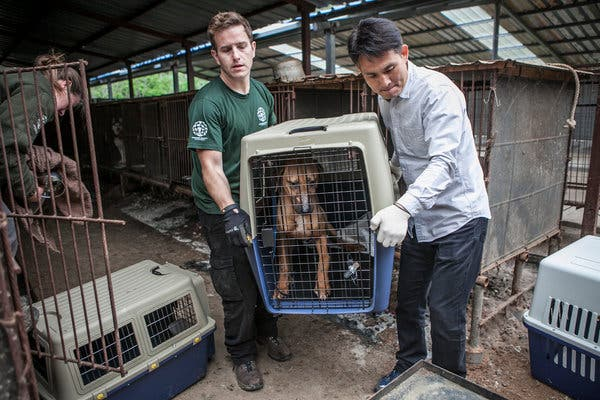

In [3]:
INDEX = 200

data = doc_lst[INDEX]
query = data["query"]
candidate = data["candidates"][0]
id = candidate["candidate_id"]
image_path = candidate["image"]
print(image_path)
headline = candidate["headline"]
print("Search Query:",query)
img = Image.open("../data/image/"+image_path)
display(img)

In [10]:
# Assuming 'data' is your 512-dimensional dataset, a numpy array with shape (number_of_samples, 512)
# Replace this with your actual data

# Generating random data for demonstration purposes
# data = np.random.rand(100, 512)  # Replace this with your data
# print(data.shape)
SIZE = 500
image_npy = image_tensors_load.numpy()
indices = random.sample(range(image_npy.shape[0]), SIZE)
# image_subset = image_npy[indices]
image_subset = image_npy[:SIZE]
print(image_subset.shape)

(500, 512)


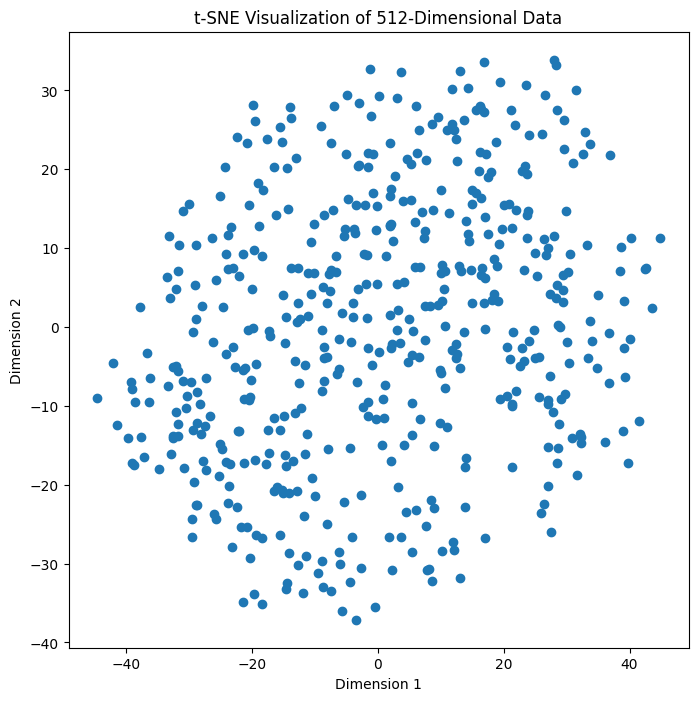

In [11]:
# Initialize t-SNE
tsne = TSNE(n_components=3, random_state=42)

# Reduce the dimensionality to 2 dimensions
embedded_data = tsne.fit_transform(image_subset)

# Plot the t-SNE visualization
plt.figure(figsize=(8, 8))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1])
plt.title('t-SNE Visualization of 512-Dimensional Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

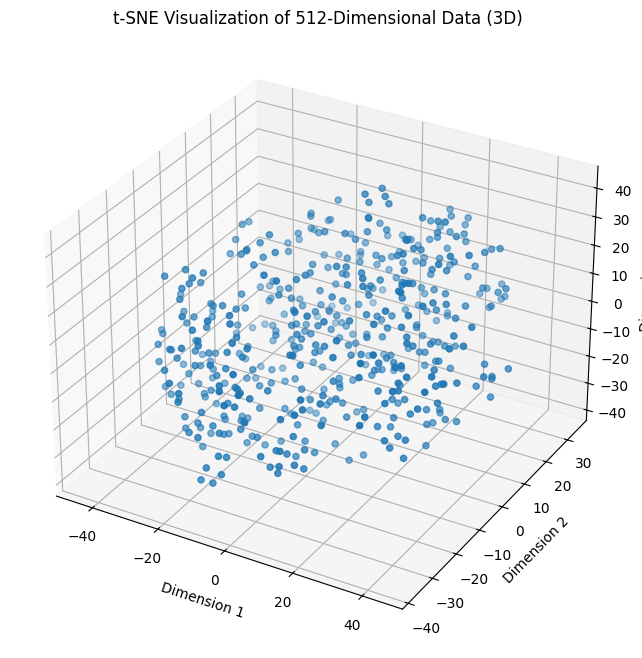

In [12]:
tsne = TSNE(n_components=3, random_state=42)
embedded_data = tsne.fit_transform(image_subset)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedded_data[:, 0], embedded_data[:, 1], embedded_data[:, 2])
ax.set_title('t-SNE Visualization of 512-Dimensional Data (3D)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

In [13]:
# Create an interactive 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=embedded_data[:, 0],
    y=embedded_data[:, 1],
    z=embedded_data[:, 2],
    mode='markers',
    marker=dict(size=5)
)])

fig.update_layout(title='t-SNE Visualization of 512-Dimensional Data (3D)',
                  scene=dict(
                      xaxis_title='Dimension 1',
                      yaxis_title='Dimension 2',
                      zaxis_title='Dimension 3'
                  )
)

fig.show()